  
<h1>Projeto 2: Análise de Aluguel de Bicicletas em Seoul, Coréia do Sul</h1>

<h2>Introdução</h2>

<p>Bem-vindo ao Projeto 2, onde exploramos o mundo das bicicletas em Seoul, Coréia do Sul. Nosso objetivo é modelar e prever a quantidade de bicicletas alugadas com base em uma variedade de fatores climáticos, incluindo temperatura, umidade e outros indicadores meteorológicos diários.</p>

<p>Neste estudo, consideramos um conjunto de variáveis independentes que abrangem aspectos como data, hora, condições climáticas, sazonalidade e eventos especiais. Todas essas variáveis desempenham um papel vital na previsão do número de bicicletas alugadas em Seoul.</p>

<h3>Variáveis Independentes</h3>

<ul>
    <li><strong>Date</strong>: Data do registro</li>
    <li><strong>Hour</strong>: Hora do dia</li>
    <li><strong>Temperature (°C)</strong>: Temperatura em graus Celsius</li>
    <li><strong>Humidity (%)</strong>: Umidade relativa em porcentagem</li>
    <li><strong>Wind Speed (m/s)</strong>: Velocidade do vento em metros por segundo</li>
    <li><strong>Visibility (10m)</strong>: Visibilidade em 10 metros</li>
    <li><strong>Dew Point Temperature (°C)</strong>: Temperatura de ponto de orvalho em graus Celsius</li>
    <li><strong>Solar Radiation (MJ/m2)</strong>: Radiação solar em Megajoules por metro quadrado</li>
    <li><strong>Rainfall (mm)</strong>: Precipitação em milímetros</li>
    <li><strong>Snowfall (cm)</strong>: Acúmulo de neve em centímetros</li>
    <li><strong>Seasons</strong>: Estação do ano (Primavera, Verão, Outono, Inverno)</li>
    <li><strong>Holiday</strong>: Indicador de dia de feriado</li>
    <li><strong>Functioning Day</strong>: Indicador de funcionamento do sistema de aluguel</li>
</ul>

<h3>Variável Dependente</h3>

<ul>
    <li><strong>Rented Bike Count</strong>: A quantidade de bicicletas alugadas</li>
</ul>

<p>Este projeto visa explorar a relação entre essas variáveis independentes e a variável dependente, proporcionando insights valiosos sobre o comportamento de aluguel de bicicletas em Seoul. Através da análise e modelagem de dados, buscamos entender os padrões de uso das bicicletas na cidade e aprimorar nossa capacidade de prever a demanda futura.</p>

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding='ISO-8859-1')

In [3]:
list(df)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [4]:
df.head(3)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes

In [5]:
df['Rented Bike Count'].value_counts(sort=True)

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

In [6]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

<h2>Limpeza da base de dados</h2>

In [7]:
#Verificando se o dataset possui valores nulos
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
#Verificando se o dataset possui valores NaN
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Assim, podemos verificar que não temos valores nulos ou ausentes, portanto, podemos dar continuidade análise exploratória.

In [9]:
df.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

<h3>Selecionando os features mais relevantes</h3>
    <p>Para otimizar nosso estudo, é crucial direcionar nossa atenção para as colunas (features) mais impactantes na previsão do diagnóstico do paciente. Realizaremos uma análise minuciosa da relevância de cada feature, atribuindo a cada uma um score que reflete sua contribuição para a classificação. Ao avaliar esses scores, teremos a capacidade de descartar as features menos relevantes, concentrando assim nosso foco nas variáveis que exercem maior influência na determinação do diagnóstico. Esse processo seletivo nos permitirá aprimorar a precisão de nossa modelagem, destacando os elementos cruciais para uma previsão eficaz</p>

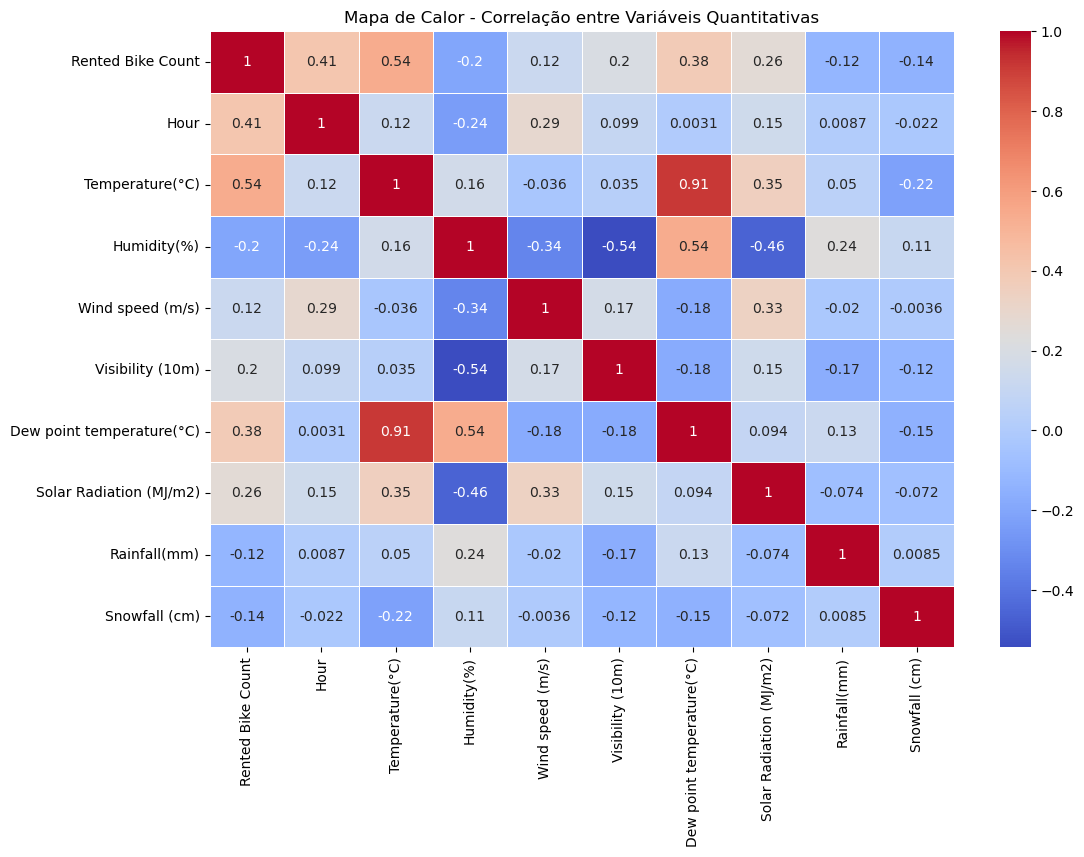

In [10]:
# Selecione apenas as variáveis quantitativas
variaveis_quantitativas = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(variaveis_quantitativas.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor - Correlação entre Variáveis Quantitativas')
plt.show()

Portanto, com o intuito de reduzir a dimensionalidade podemos retirar a coluna:

<ul>
    <li><strong>Dew point temperature(°C)</strong>: Temperatura de ponto de orvalho em graus Celsius</li>
</ul>

In [11]:
df = df.drop(['Dew point temperature(°C)'], axis=1)

In [12]:
df.head(3)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0               2.2              2000                      0.0           0.0   
1               0.8              2000                      0.0           0.0   
2               1.0              2000                      0.0           0.0   

   Snowfall (cm) Seasons     Holiday Functioning Day  
0            0.0  Winter  No Holiday             Yes  
1            0.0  Winter  No Holiday             Yes  
2            0.0  Winter  No Holiday             Yes

In [13]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

A partir da análise da variável 'Functioning Day', concluímos que não é possível tirar informações relevantes dela, uma vez que esta divide a base dados em dias que há possibilidade de aluguel ou não.

Portanto, podemos retirá-la da nossa análise.
<ul>
    <li><strong>Functioning Day</strong>:Indicador de funcionamento do sistema de aluguel</li>
</ul>

In [14]:
df = df[df['Functioning Day'] != 'No']

In [15]:
df['Functioning Day'].value_counts()

Yes    8465
Name: Functioning Day, dtype: int64

In [16]:
df = df.drop(['Functioning Day'], axis=1)

In [17]:
df.head(3)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   

   Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0               2.2              2000                      0.0           0.0   
1               0.8              2000                      0.0           0.0   
2               1.0              2000                      0.0           0.0   

   Snowfall (cm) Seasons     Holiday  
0            0.0  Winter  No Holiday  
1            0.0  Winter  No Holiday  
2            0.0  Winter  No Holiday

<h2>Início da Análise Exploratória</h2>


<p>A análise exploratória de dados é uma etapa fundamental em qualquer projeto de ciência de dados, incluindo o seu estudo sobre o aluguel de bicicletas em Seoul. Ela envolve a exploração inicial e sumarização de dados brutos para descobrir padrões, identificar tendências, detectar anomalias e obter uma compreensão inicial do conjunto de dados</p>

<p> Utilizando técnicas visuais e estatísticas, exploraremos:</p>

<ul>
<li><strong>Tendências Temporais</strong>: Identificaremos flutuações ao longo do tempo, como variações diárias ou sazonais.</li>

<li><strong>Impacto das Condições Climáticas</strong>: Analisaremos como fatores climáticos afetam o número de bicicletas alugadas.</li>

<li><strong>Efeito das Estações e Feriados</strong>: Investigaremos se a demanda varia significativamente entre diferentes estações do ano e em dias especiais.</li>
</ul>
<p>Essa análise nos permitirá identificar padrões emergentes, entender correlações entre variáveis e formular hipóteses para a modelagem preditiva. Esses insights fornecerão uma base sólida para prever a demanda futura de bicicletas, otimizando a eficiência do sistema de aluguel.</p>

### Relação entre todas as features
Nesse tópico, vamos plotar um gráfico que mostra a disperção entre todos os valores, combinados dois a dois. Essa avaliação é muito importante pelo fato de nos dar uma visão global do compartamento de cada variável em relação às outras.

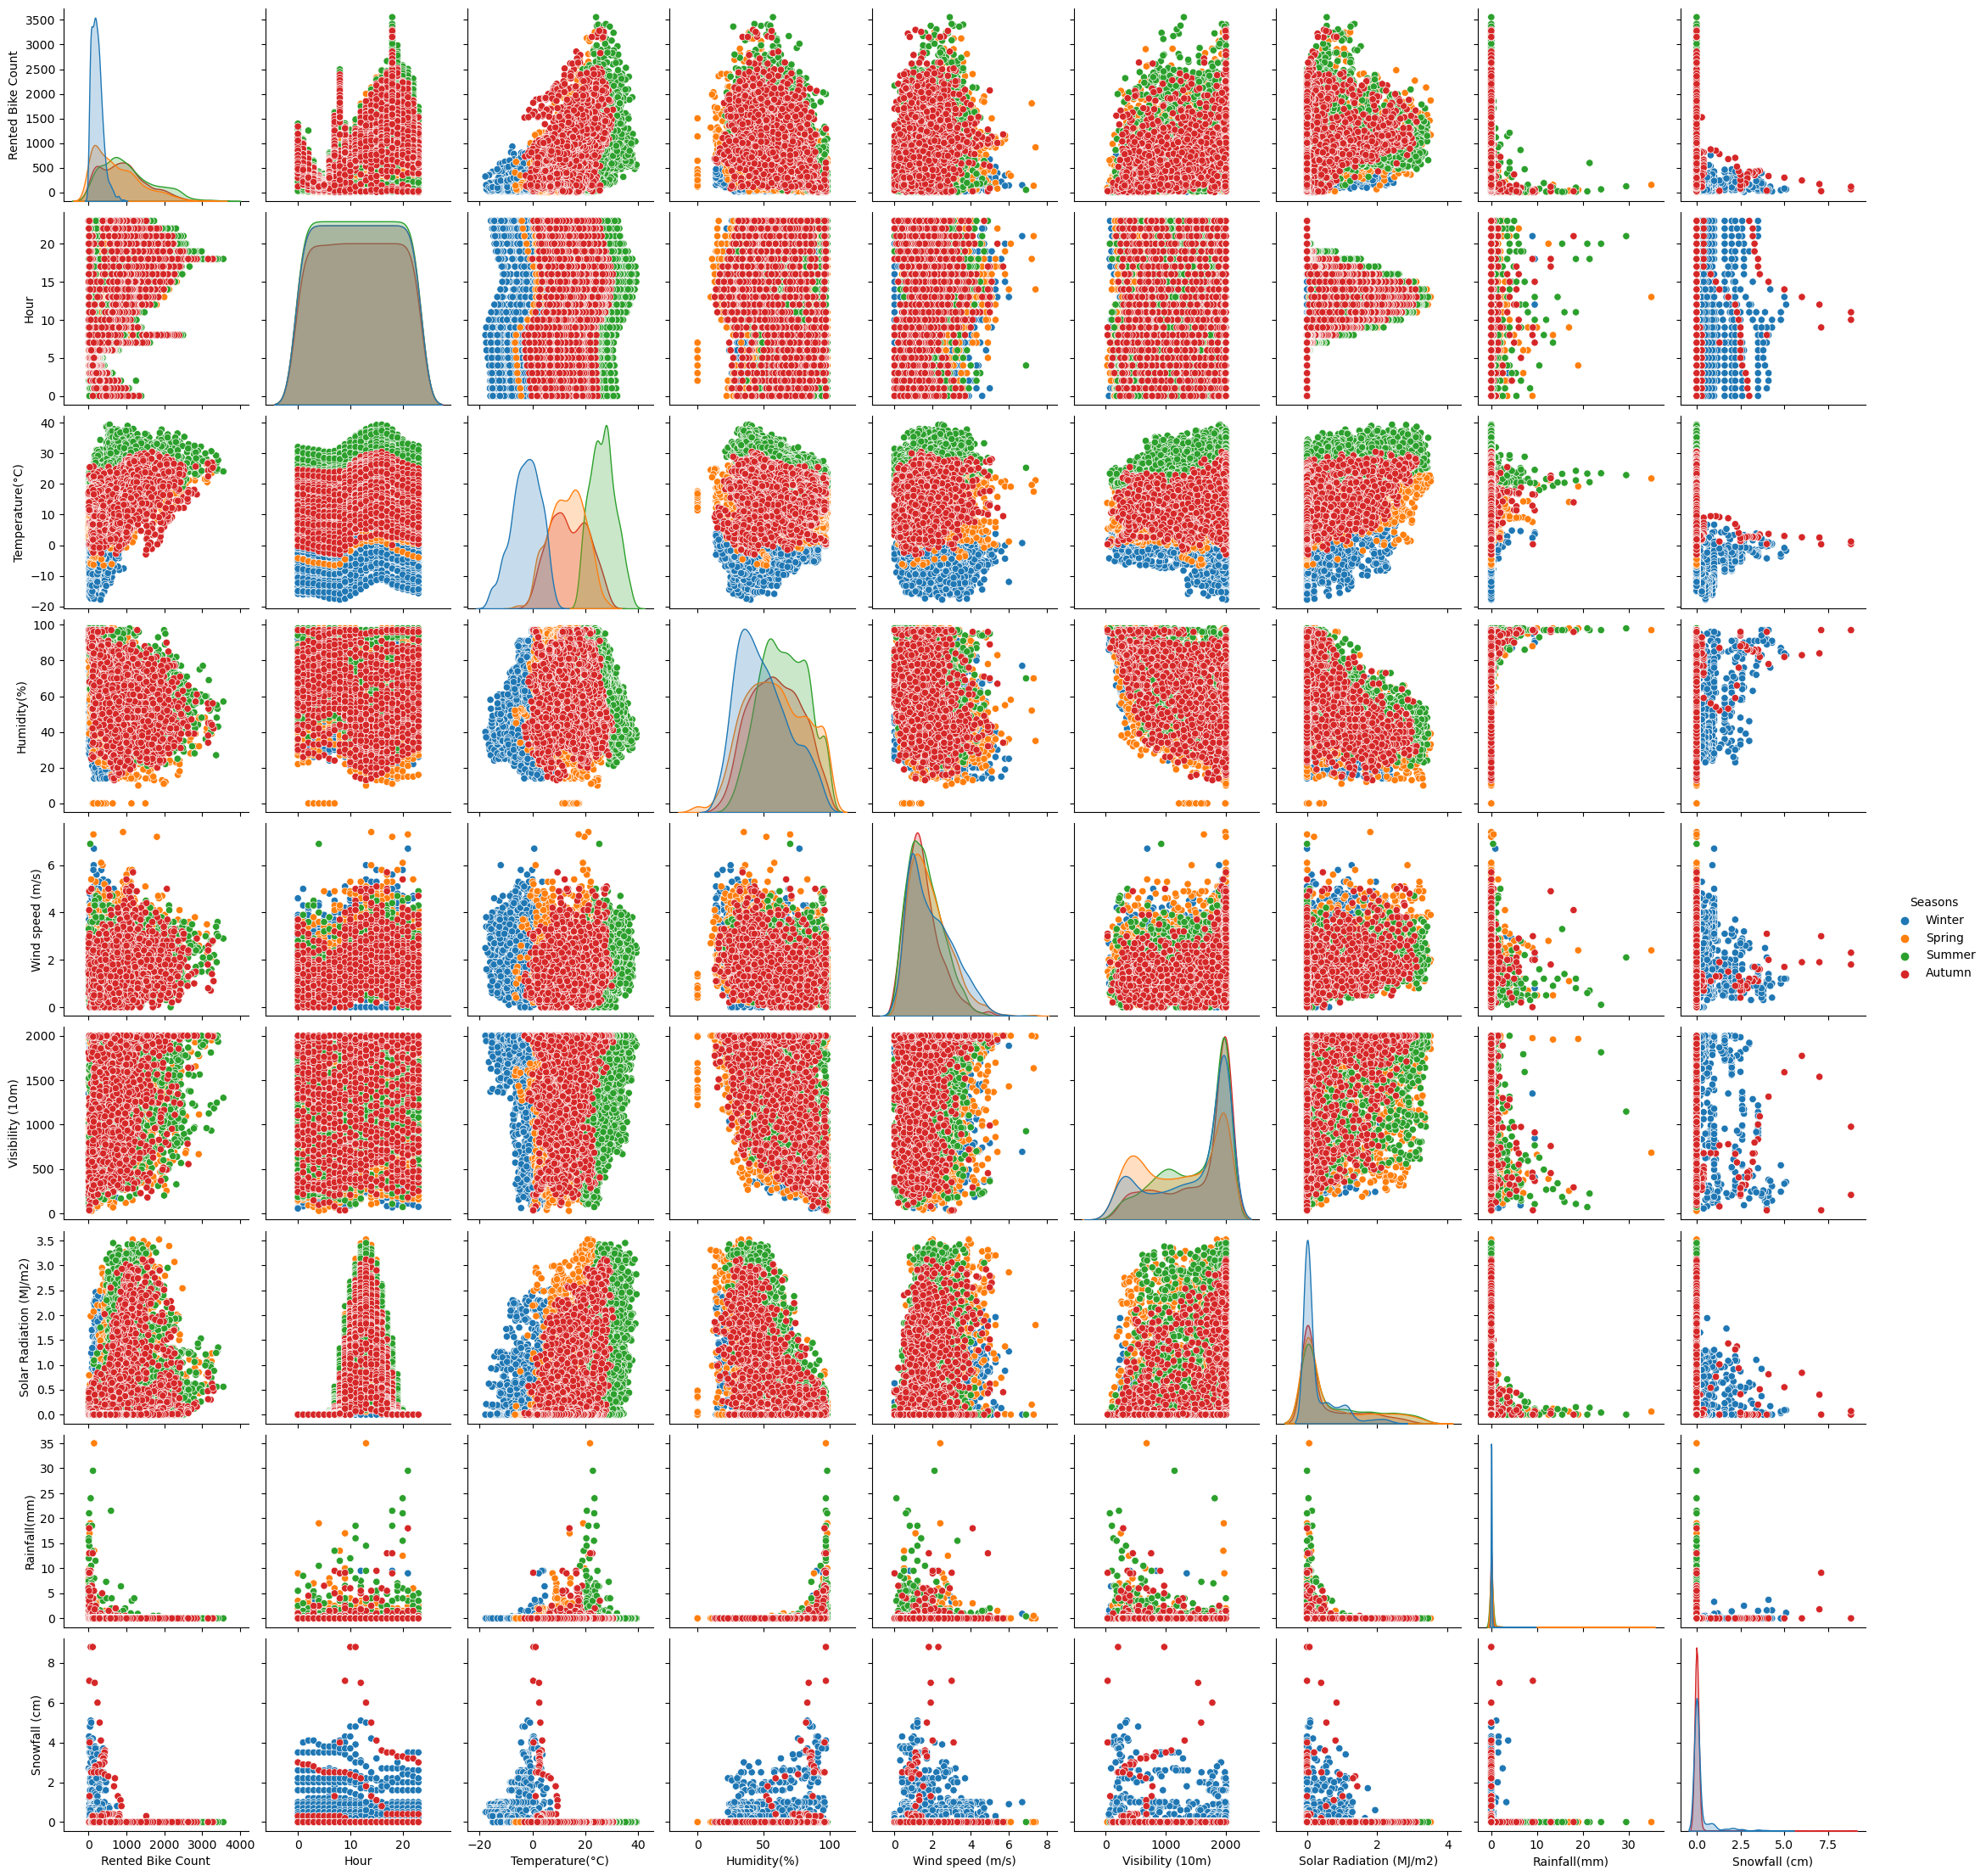

In [18]:
sns.pairplot(df, hue='Seasons')
plt.show()

<h2> Dividindo a base de dados em 3</h2>

<p>No projeto de análise de aluguel de bicicletas em Seoul, optou-se por dividir a base de dados em três grupos <strong>- Alto, Médio e Baixo - </strong> considerando a variável "Bicicletas Alugadas". Essa abordagem oferece vantagens significativas, simplificando a <strong>identificação de padrões específicos</strong> em diferentes contextos. Ao segmentar os dados, análises descritivas e visualizações tornam-se mais claras, proporcionando uma compreensão mais aprofundada do comportamento da variável dependente. Essa divisão em grupos também facilita o <strong>desenvolvimento de modelos preditivos</strong> mais precisos, apoia decisões de negócios e promove uma interpretação intuitiva dos resultados, tornando o projeto mais acessível a diversos públicos.</p>

In [19]:
#Transformando a variável quantitativa em qualitativa ordinal
df['Aluguel'] = pd.cut(df['Rented Bike Count'], bins=[0,1000,2000,3600], right=False)
df.Aluguel.cat.categories = ['Baixo', 'Médio', 'Alto']
df.Aluguel.value_counts()

Baixo    6045
Médio    1936
Alto      484
Name: Aluguel, dtype: int64

In [20]:
list(df)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Aluguel']

In [21]:
df['Rented Bike Count'].describe()

count    8465.000000
mean      729.156999
std       642.351166
min         2.000000
25%       214.000000
50%       542.000000
75%      1084.000000
max      3556.000000
Name: Rented Bike Count, dtype: float64

<h3>Baixo aluguel</h3>

In [22]:
df_baixo = df.loc[df.Aluguel == 'Baixo', :]
df_baixo.Aluguel.value_counts()

Baixo    6045
Médio       0
Alto        0
Name: Aluguel, dtype: int64

<h3>Médio aluguel</h3>

In [23]:
df_medio = df.loc[df.Aluguel == 'Médio', :]
df_medio.Aluguel.value_counts()

Médio    1936
Baixo       0
Alto        0
Name: Aluguel, dtype: int64

<h3>Alto aluguel</h3>

In [24]:
df_alto = df.loc[df.Aluguel == 'Alto', :]
df_alto.Aluguel.value_counts()

Alto     484
Baixo      0
Médio      0
Name: Aluguel, dtype: int64

<h2> Analisando o comportamento dos Features</h2>

In [53]:
def plotar_distribuicao_por_categoria(dataframe, categorias, categoria_col, valor_col, faixas):
    fig = plt.figure(figsize=(20, 8))

    # Define as cores correspondentes
    cores = {'Alto': 'red', 'Médio': 'green', 'Baixo': 'blue'}

    for i, categoria in enumerate(categorias):
        # Cria subgráficos
        plt.subplot(1, len(categorias), i + 1)

        # Filtra os dados pela categoria específica
        dados_categoria = dataframe[dataframe[categoria_col] == categoria]

        # Plota o histograma
        plt.hist(dados_categoria[valor_col], bins=faixas, edgecolor='white', density=True, color=cores[categoria])
        plt.title(categoria)

    # Adiciona título geral para o conjunto de subgráficos
    fig.suptitle(f'Distribuição por Categoria - {valor_col}', fontsize=22, y=1.02)

    # Cria legendas de cores
    legendas_cores = [Patch(color=c, label=cat) for cat, c in cores.items()]

    # Adiciona a legenda
    plt.legend(handles=legendas_cores, bbox_to_anchor=(1.1, 0.8), loc='upper left', borderaxespad=1)

    plt.tight_layout()  # Ajusta layout para evitar sobreposição com os títulos e legendas
    plt.show()

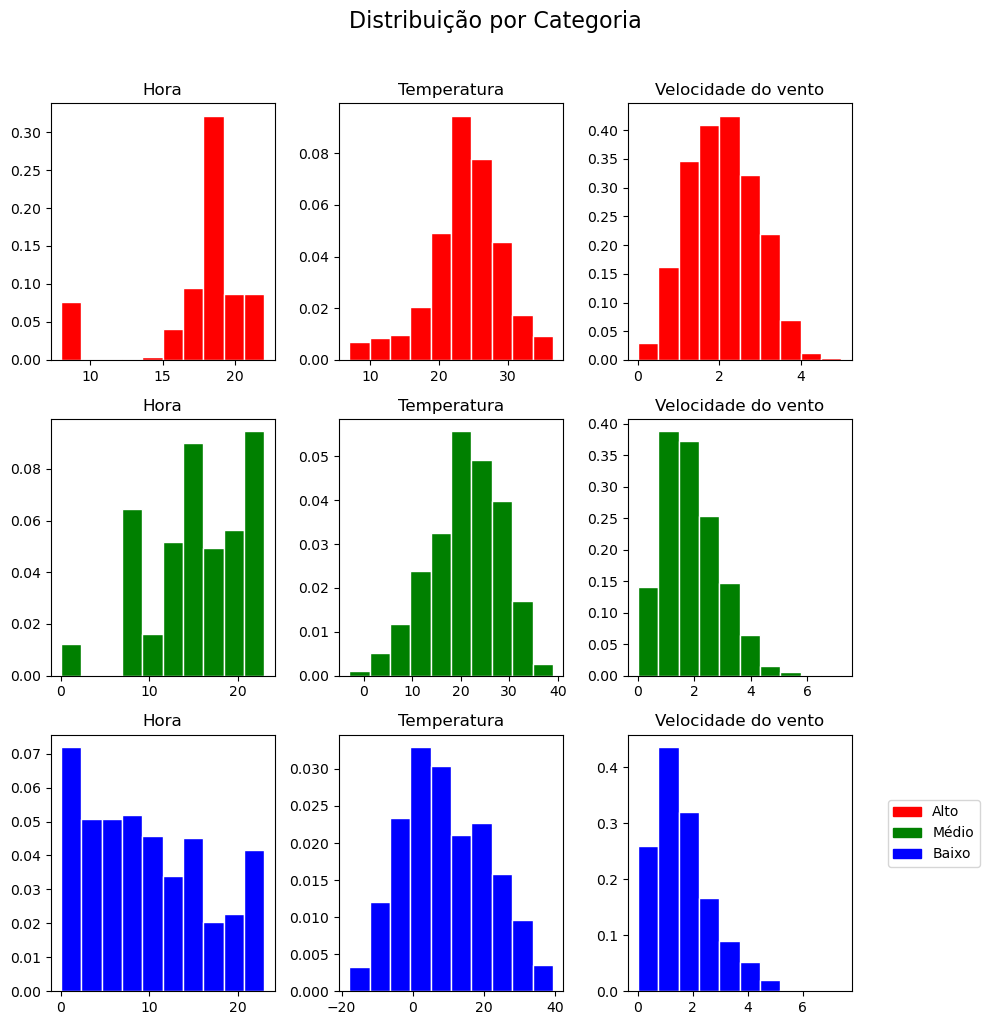

In [25]:
fig = plt.figure(figsize=(10, 10))

# Define as cores correspondentes
cores = {'Alto': 'red', 'Médio': 'green', 'Baixo': 'blue'}

# Alto
plt.subplot(331)
plt.hist(df_alto.Hour, edgecolor='white', density=True, color=cores['Alto'])
plt.title('Hora')

plt.subplot(332)
plt.hist(df_alto['Temperature(°C)'], edgecolor='white', density=True, color=cores['Alto'])
plt.title('Temperatura')

plt.subplot(333)
plt.hist(df_alto['Wind speed (m/s)'], edgecolor='white', density=True, color=cores['Alto'])
plt.title('Velocidade do vento')

# Médio
plt.subplot(334)
plt.hist(df_medio.Hour, edgecolor='white', density=True, color=cores['Médio'])
plt.title('Hora')

plt.subplot(335)
plt.hist(df_medio['Temperature(°C)'], edgecolor='white', density=True, color=cores['Médio'])
plt.title('Temperatura')

plt.subplot(336)
plt.hist(df_medio['Wind speed (m/s)'], edgecolor='white', density=True, color=cores['Médio'])
plt.title('Velocidade do vento')

# Baixo
plt.subplot(337)
plt.hist(df_baixo.Hour, edgecolor='white', density=True, color=cores['Baixo'])
plt.title('Hora')

plt.subplot(338)
plt.hist(df_baixo['Temperature(°C)'], edgecolor='white', density=True, color=cores['Baixo'])
plt.title('Temperatura')

plt.subplot(339)
plt.hist(df_baixo['Wind speed (m/s)'], edgecolor='white', density=True, color=cores['Baixo'])
plt.title('Velocidade do vento')

# Adiciona título geral para o conjunto de subgráficos
fig.suptitle('Distribuição por Categoria', fontsize=16, y=1.02)

# Cria legendas de cores
legendas_cores = [Patch(color=c, label=cat) for cat, c in cores.items()]

# Adiciona a legenda
plt.legend(handles=legendas_cores, bbox_to_anchor=(1.1, 0.8), loc='upper left', borderaxespad=1)

plt.tight_layout()  # Ajusta layout para evitar sobreposição com os títulos e legendas
plt.show()


<h3>Fazendo uma análise mais aprofundada de cada feature, temos:</h3>

<h4>Análise da variável HORA:</h4>

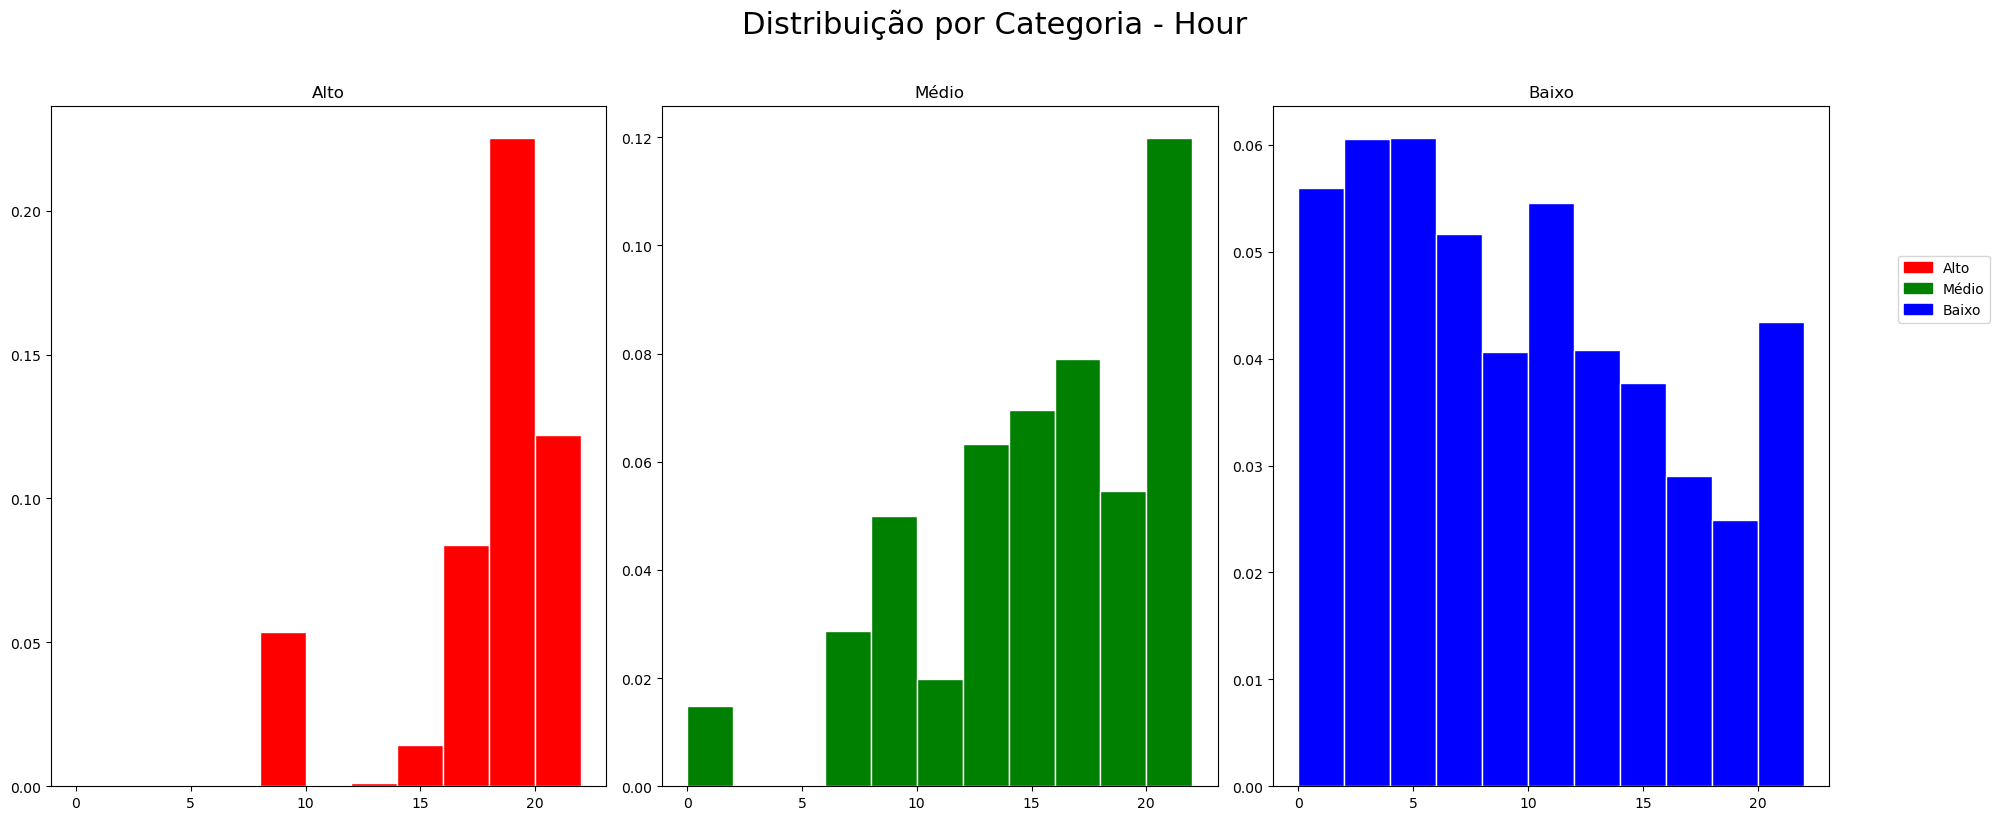

In [55]:
# Exemplo de uso
categorias = ['Alto', 'Médio', 'Baixo']
faixas = np.arange(0, 24, 2)

plotar_distribuicao_por_categoria(df, categorias, 'Aluguel', 'Hour', faixas)

<ul>
    <li><strong>Hour</strong> : Hora do dia</li>
</ul>

Verificando os gráficos de histograma da variável "Hour", podemos extrair que o comportamento do aluguel de bicicletas tende a aumentar conforme o dia escurece.

<p>Além disso, é possível observar que o <strong>pico</strong> de bicicletas alugadas ocorre ás <strong>17h</strong></p>



<h4>Análise da variável TEMPERATURA:</h4>

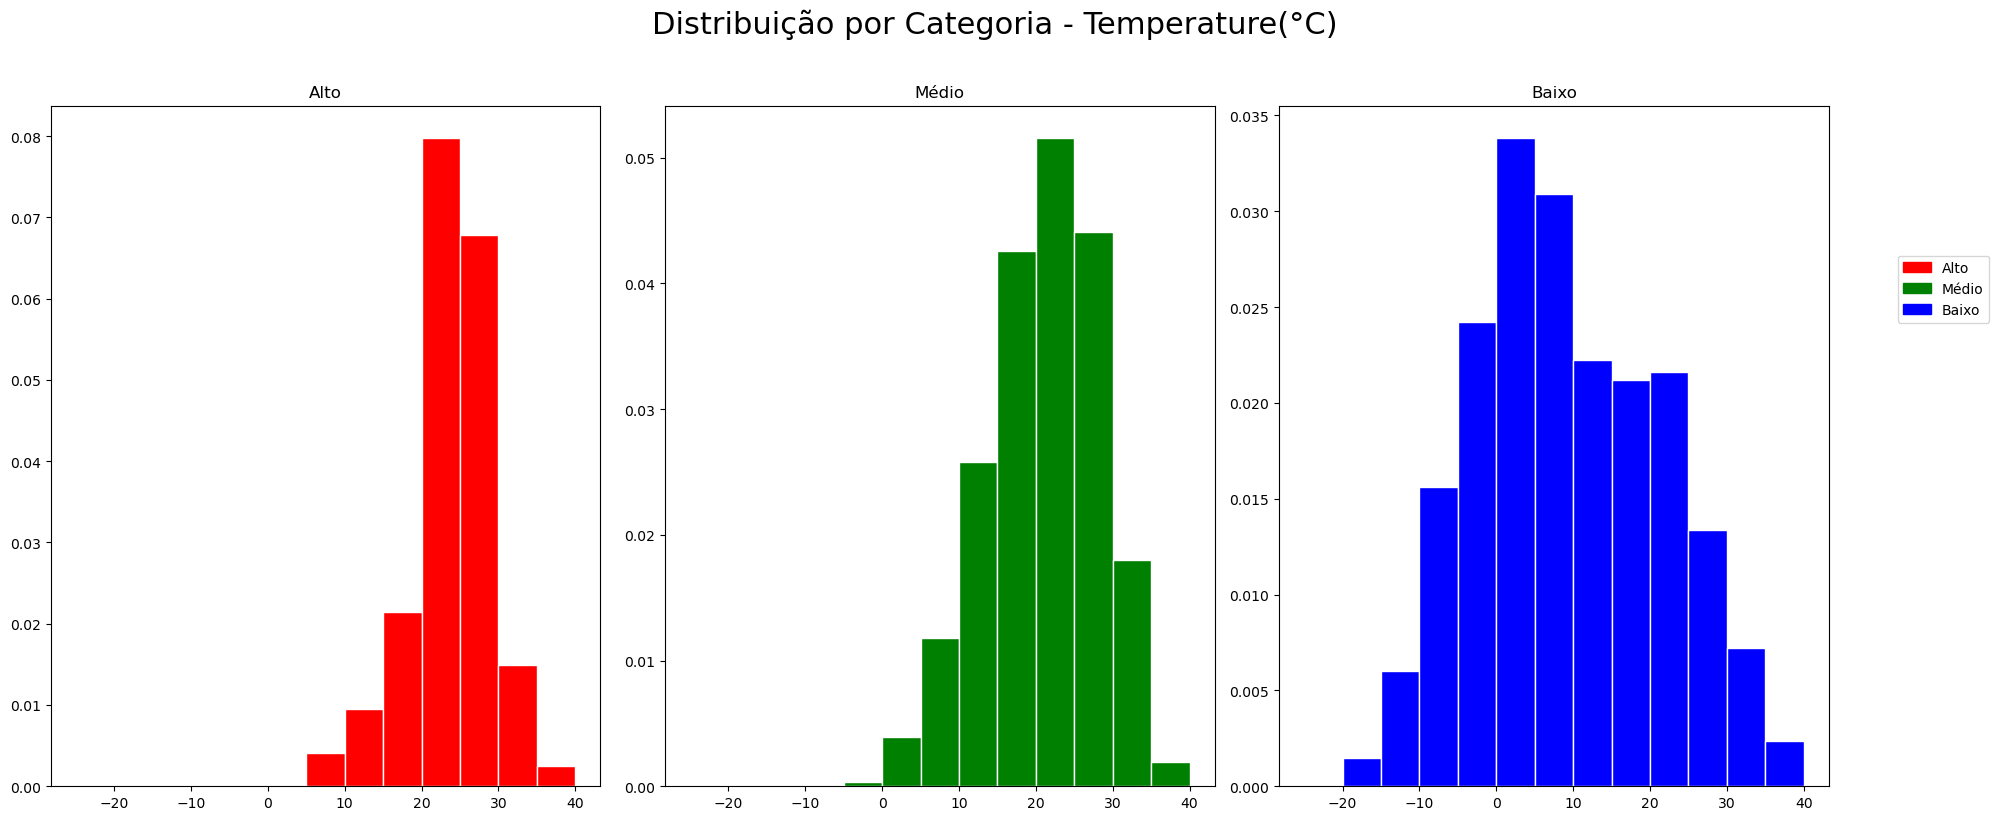

In [54]:
# Exemplo de uso
categorias = ['Alto', 'Médio', 'Baixo']
faixas = np.arange(-25, 45, 5)

plotar_distribuicao_por_categoria(df, categorias, 'Aluguel', 'Temperature(°C)', faixas)

<ul>
    <li><strong>Temperature(°C)</strong> : Temperatura em graus Celsius</li>
</ul>

Atráves da análise dos gráficos dessa variável, podemos concluir que a temperatura realiza uma <strong>distribuição normal</strong>, onde o μ varia em cada um dos cenários propostos.

Ademais, é possível perceber que a faixa de temperatura onde ocorrem os maiores números de aluguel é <strong>[15-35] °C</strong>, onde o pico ocorre em <strong>25°C</strong>.



<h4>Análise da variável VELOCIDADE DO VENTO:</h4>

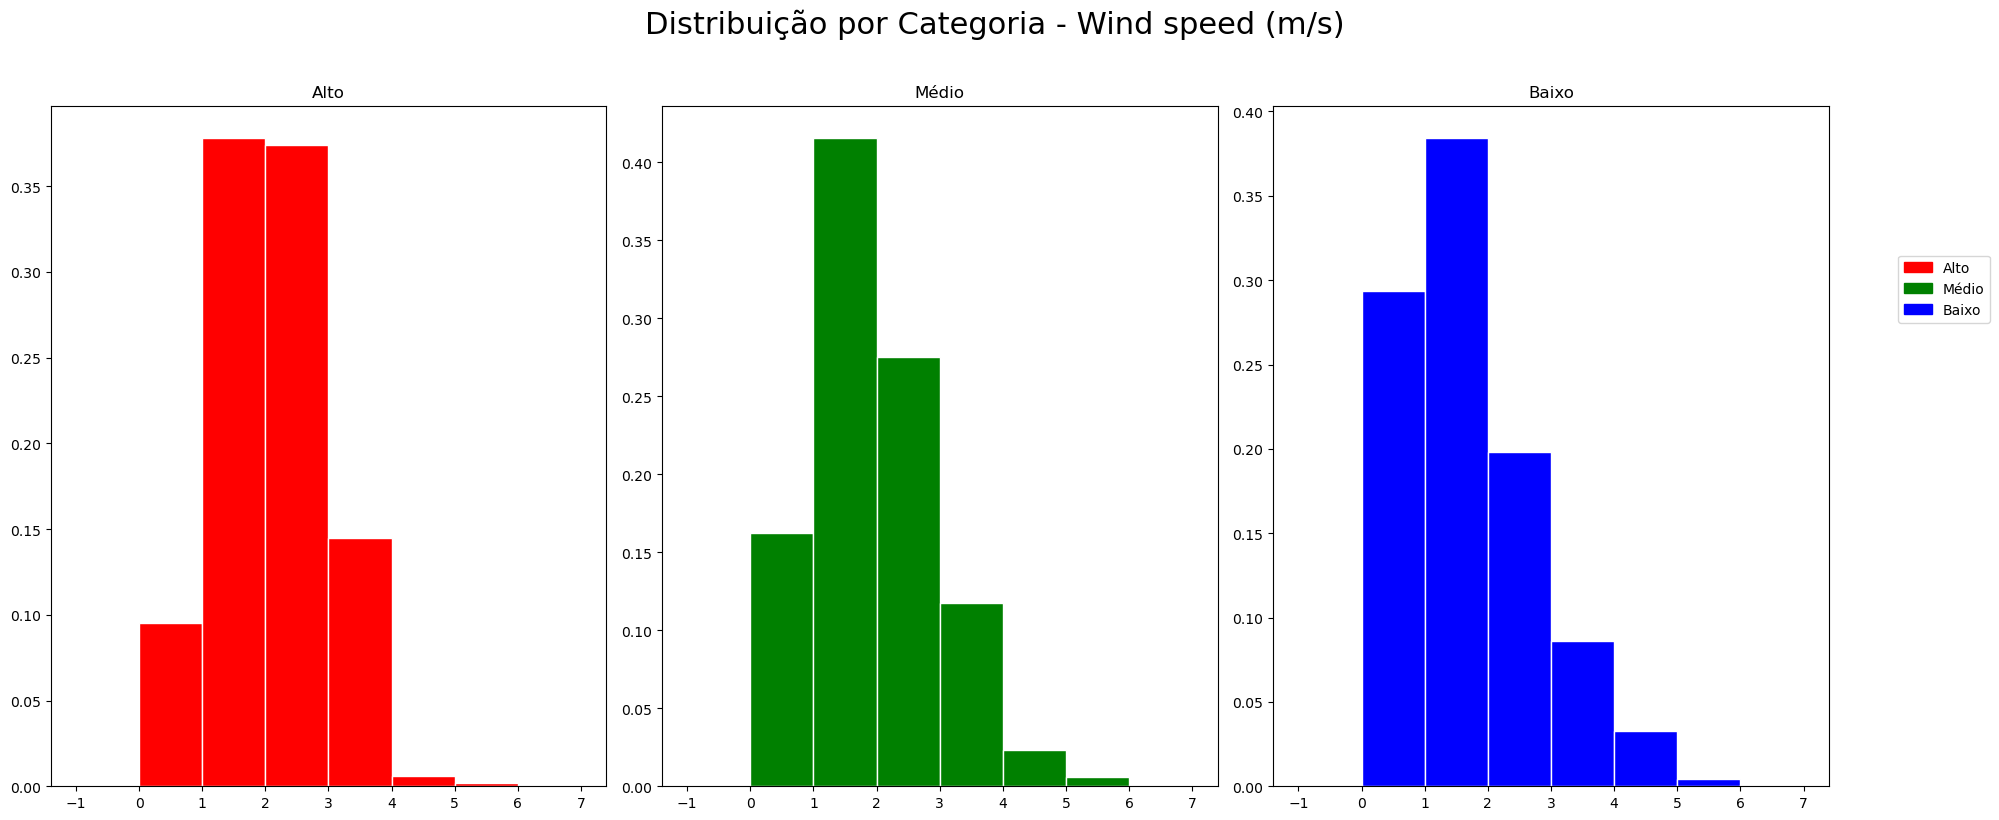

In [56]:
# Exemplo de uso
categorias = ['Alto', 'Médio', 'Baixo']
faixas_vento = np.arange(-1,8,1)

plotar_distribuicao_por_categoria(df, categorias, 'Aluguel', 'Wind speed (m/s)', faixas_vento)

<li><strong>Wind Speed (m/s)</strong>: Velocidade do vento em metros por segundo</li>

Podemos perceber que os 3 gráficos possuem uma aparência de uma distribuição normal, entretanto há uma diferença entre elas. Tanto a categoria "Média" quanto a "Baixa" possuem uma assimetria á direita, e a categoria "Alta" possui um comportamento simétrico.

Ademais, é possível perceber que a faixa de velocidade do vento onde ocorrem os maiores números de aluguel é <strong>[0.5 - 4] m/s</strong>, onde o pico ocorre por volta de <strong>2,5 m/s</strong>.



<h4>Análise das variáveis QUALITATIVAS:</h4>

<Figure size 1000x1000 with 0 Axes>

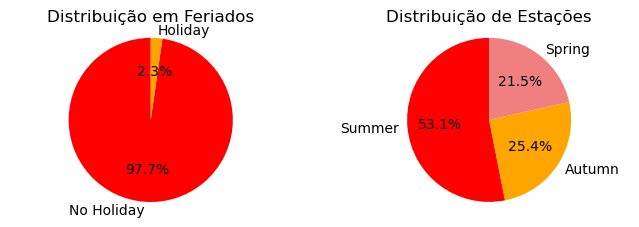

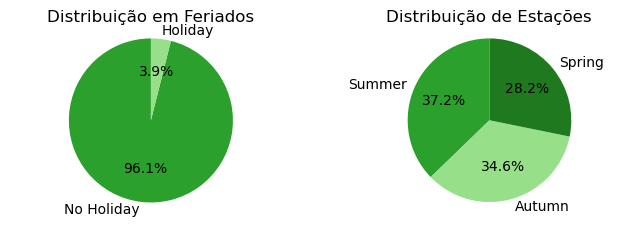

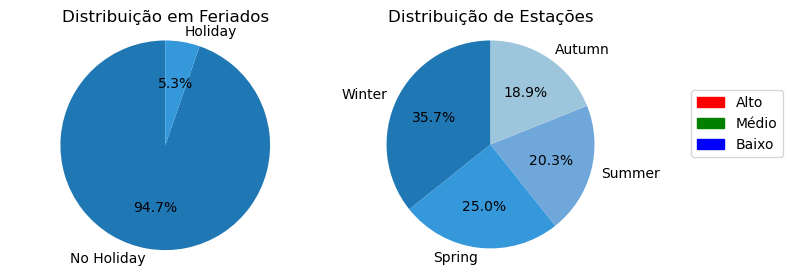

In [29]:
fig = plt.figure(figsize=(10, 10))

# Define as cores correspondentes
cores = {'Alto': 'red', 'Médio': 'green', 'Baixo': 'blue'}

# Alto
# Contagem de ocorrências de cada categoria na coluna 'Seasons'
counts = df_alto['Holiday'].value_counts()
colors1 = ['red', 'orange', 'lightcoral']

# Configurando o gráfico de pizza
fig = plt.figure(figsize=(8, 8))
plt.subplot(321)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors1)
# Ajustando aspectos visuais
plt.axis('equal')  # Garante que o gráfico de pizza seja circular
plt.title('Distribuição em Feriados')

counts = df_alto['Seasons'].value_counts()
plt.subplot(322)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors1)
# Ajustando aspectos visuais
plt.axis('equal')  # Garante que o gráfico de pizza seja circular
plt.title('Distribuição de Estações')

# Médio
# Contagem de ocorrências de cada categoria na coluna 'Seasons'
counts = df_medio['Holiday'].value_counts()
colors2 = ['#2ca02c', '#98df8a', '#1f7a1f']

# Configurando o gráfico de pizza
fig = plt.figure(figsize=(8, 8))
plt.subplot(323)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors2)
# Ajustando aspectos visuais
plt.axis('equal')  # Garante que o gráfico de pizza seja circular
plt.title('Distribuição em Feriados')

counts = df_medio['Seasons'].value_counts()
plt.subplot(324)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors2)
# Ajustando aspectos visuais
plt.axis('equal')  # Garante que o gráfico de pizza seja circular
plt.title('Distribuição de Estações')

# Baixo
# Contagem de ocorrências de cada categoria na coluna 'Seasons'
counts = df_baixo['Holiday'].value_counts()
colors3 = ['#1f77b4', '#3498db', '#6fa7db', '#9dc5dc']

# Configurando o gráfico de pizza
fig = plt.figure(figsize=(8, 8))
plt.subplot(325)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors3)
# Ajustando aspectos visuais
plt.axis('equal')  # Garante que o gráfico de pizza seja circular
plt.title('Distribuição em Feriados')

counts = df_baixo['Seasons'].value_counts()
plt.subplot(326)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors3)
# Ajustando aspectos visuais
plt.axis('equal')  # Garante que o gráfico de pizza seja circular
plt.title('Distribuição de Estações')

# Cria legendas de cores
legendas_cores = [Patch(color=c, label=cat) for cat, c in cores.items()]

# Adiciona a legenda
plt.legend(handles=legendas_cores, bbox_to_anchor=(1.1, 0.8), loc='upper left', borderaxespad=1)

plt.tight_layout()  # Ajusta layout para evitar sobreposição com os títulos e legendas
plt.show()

<li><strong>Seasons</strong>: Estação do ano (Primavera, Verão, Outono, Inverno)</li>

Com o auxílio dos gráficos de pizza, é possível concluir que o maior número aluguéis de bicicletas ocorre no <strong>Verão</strong>

<h2>Variáveis pouco relevantes</h2>

<p>No projeto de aluguel de bicicletas em Seoul, é essencial identificar features irrelevantes para otimizar a análise. Isso pode ser feito considerando a correlação com a variável dependente, visualizações gráficas, e testes estatísticos de significância.Essa abordagem multifacetada visa criar modelos mais precisos e <strong>interpretar padrões de aluguel de bicicletas de forma clara.</strong></p>

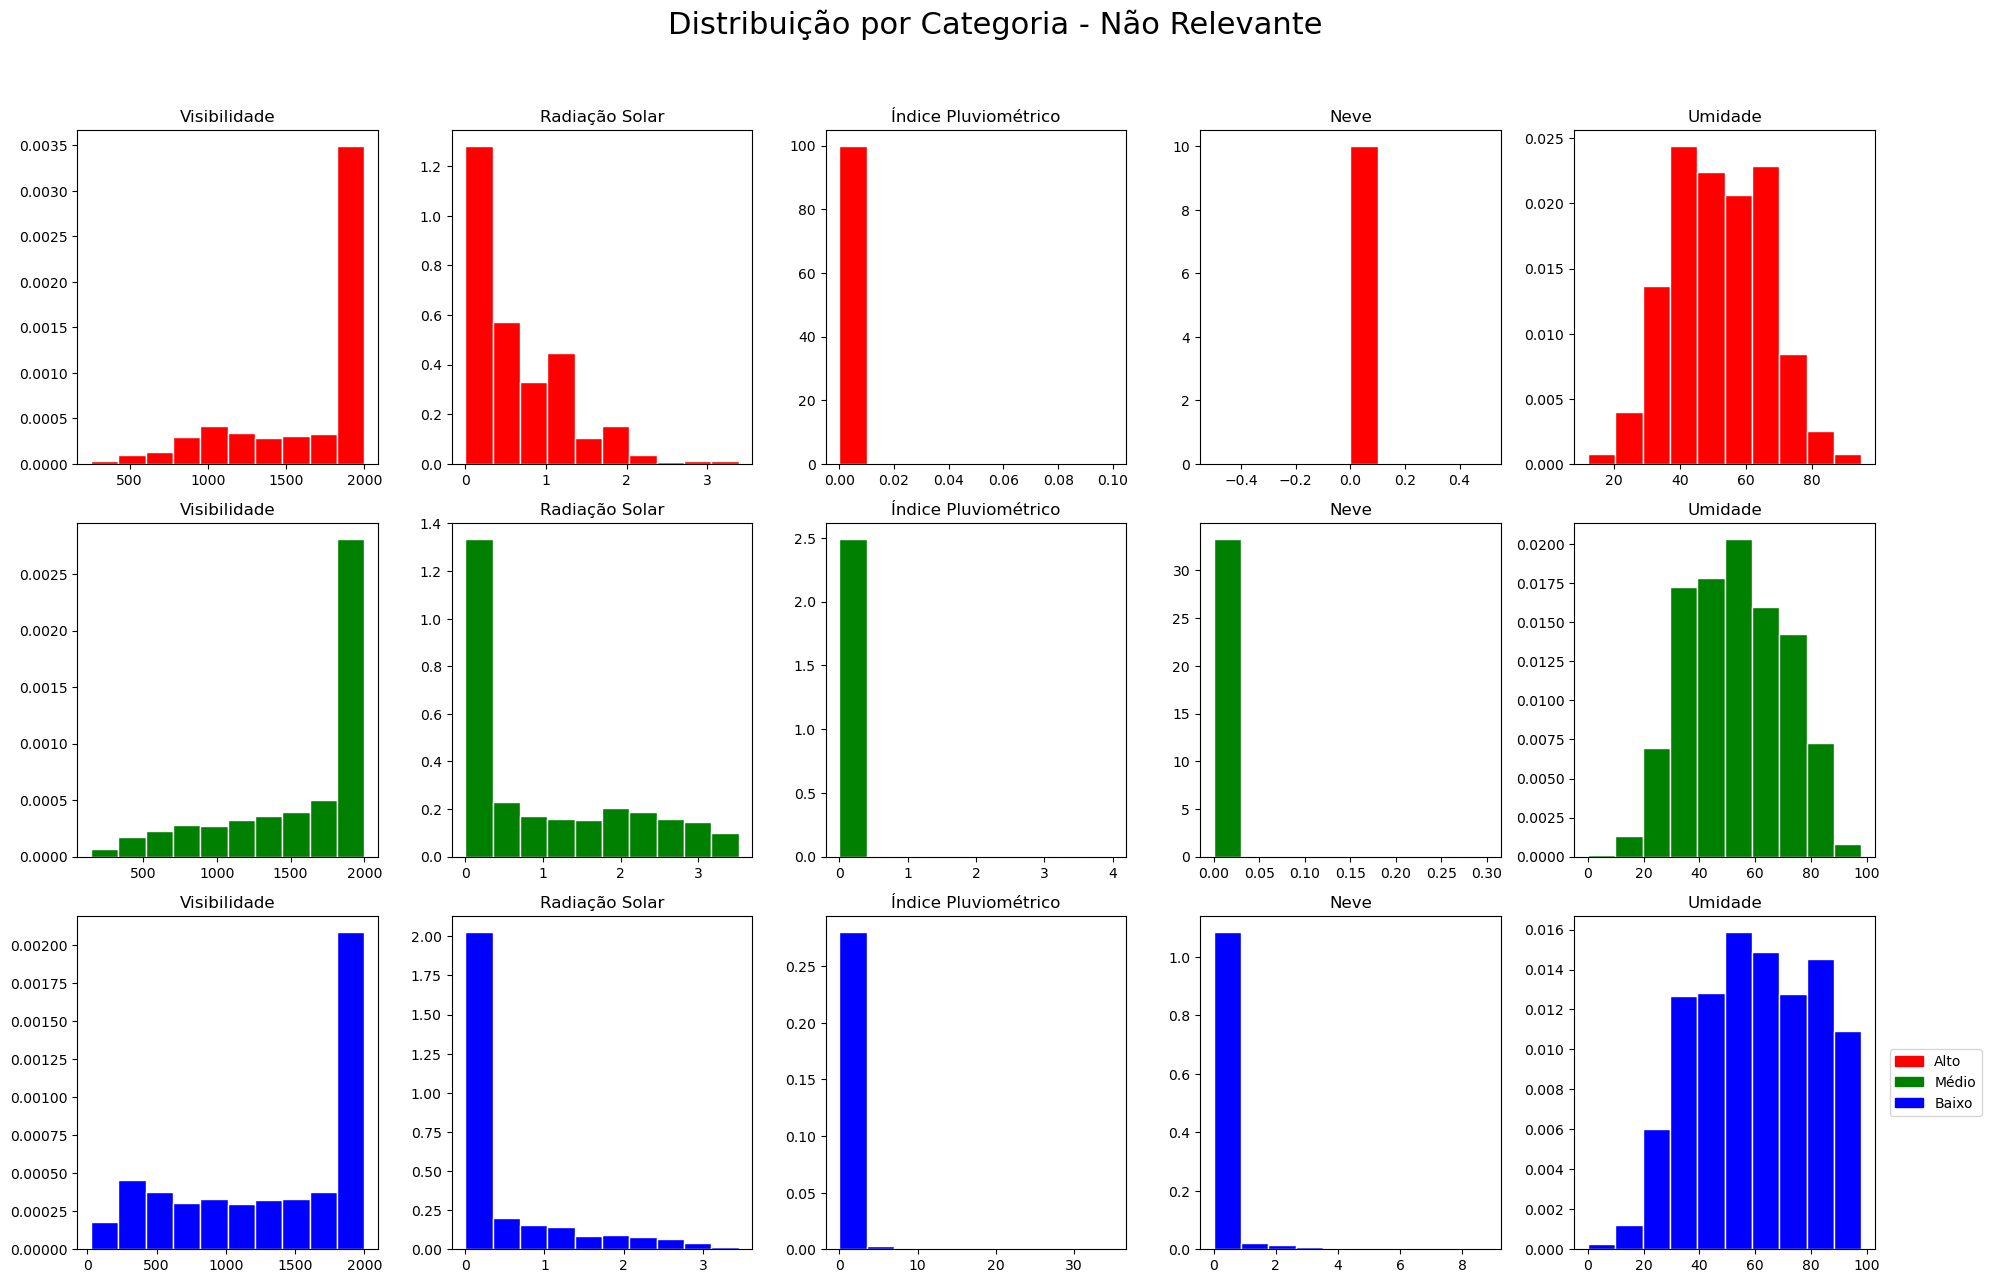

In [30]:
fig = plt.figure(figsize=(20, 20))

# Define as cores correspondentes
cores = {'Alto': 'red', 'Médio': 'green', 'Baixo': 'blue'}

# Alto
plt.subplot(551)
plt.hist(df_alto['Visibility (10m)'], edgecolor='white', density=True, color=cores['Alto'])
plt.title('Visibilidade')

plt.subplot(552)
plt.hist(df_alto['Solar Radiation (MJ/m2)'], edgecolor='white', density=True, color=cores['Alto'])
plt.title('Radiação Solar')

plt.subplot(553)
plt.hist(df_alto['Rainfall(mm)'], edgecolor='white', density=True, color=cores['Alto'])
plt.title('Índice Pluviométrico')

plt.subplot(554)
plt.hist(df_alto['Snowfall (cm)'], edgecolor='white', density=True, color=cores['Alto'])
plt.title('Neve')

plt.subplot(555)
plt.hist(df_alto['Humidity(%)'], edgecolor='white', density=True, color=cores['Alto'])
plt.title('Umidade')


# Médio
plt.subplot(556)
plt.hist(df_medio['Visibility (10m)'], edgecolor='white', density=True, color=cores['Médio'])
plt.title('Visibilidade')

plt.subplot(557)
plt.hist(df_medio['Solar Radiation (MJ/m2)'], edgecolor='white', density=True, color=cores['Médio'])
plt.title('Radiação Solar')

plt.subplot(558)
plt.hist(df_medio['Rainfall(mm)'], edgecolor='white', density=True, color=cores['Médio'])
plt.title('Índice Pluviométrico')

plt.subplot(559)
plt.hist(df_medio['Snowfall (cm)'], edgecolor='white', density=True, color=cores['Médio'])
plt.title('Neve')

plt.subplot(5, 5, 10)
plt.hist(df_medio['Humidity(%)'], edgecolor='white', density=True, color=cores['Médio'])
plt.title('Umidade')


# Baixo
plt.subplot(5, 5, 11)
plt.hist(df_baixo['Visibility (10m)'], edgecolor='white', density=True, color=cores['Baixo'])
plt.title('Visibilidade')

plt.subplot(5, 5, 12)
plt.hist(df_baixo['Solar Radiation (MJ/m2)'], edgecolor='white', density=True, color=cores['Baixo'])
plt.title('Radiação Solar')

plt.subplot(5, 5, 13)
plt.hist(df_baixo['Rainfall(mm)'], edgecolor='white', density=True, color=cores['Baixo'])
plt.title('Índice Pluviométrico')

plt.subplot(5, 5, 14)
plt.hist(df_baixo['Snowfall (cm)'], edgecolor='white', density=True, color=cores['Baixo'])
plt.title('Neve')

plt.subplot(5, 5, 15)
plt.hist(df_baixo['Humidity(%)'], edgecolor='white', density=True, color=cores['Baixo'])
plt.title('Umidade')

# Adiciona título geral para o conjunto de subgráficos
fig.suptitle('Distribuição por Categoria - Não Relevante', fontsize=22, y=1.02)

# Cria legendas de cores
legendas_cores = [Patch(color=c, label=cat) for cat, c in cores.items()]

# Adiciona a legenda
plt.legend(handles=legendas_cores, bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.)

plt.tight_layout()  # Ajusta layout para evitar sobreposição com a legenda
plt.show()

<p>Realizando uma análise profunda, podemos observar que essas variáveis não possuem uma forte influência na variável de estudo, uma vez que seus gráficos não apresentam grandes mudanças de comportamento.</p>

<h2>Divisão em Treino e Teste</h2>

<h3>Criando variáveis Dummy</h3>

#### A Necessidade de Variáveis Dummy

A necessidade de criar variáveis dummy surge quando lidamos com variáveis categóricas em um contexto de análise de dados ou modelagem estatística. As variáveis categóricas são aquelas que representam categorias ou grupos e não têm uma relação numérica natural entre elas.

Alguns algoritmos de machine learning e técnicas estatísticas requerem que todas as entradas sejam numéricas. Variáveis categóricas, como nomes de cidades, tipos de produtos ou categorias de cores, precisam ser convertidas em um formato numérico para serem utilizadas efetivamente em tais métodos. A criação de variáveis dummy é uma técnica comum para realizar essa conversão.

Aqui estão algumas razões para a criação de variáveis dummy:

- **Compatibilidade com Algoritmos Numéricos:** Muitos algoritmos de machine learning, como regressão linear, árvores de decisão e redes neurais, operam com entradas numéricas. Ao criar variáveis dummy, transformamos informações categóricas em representações numéricas, permitindo que esses algoritmos compreendam e usem essas características.

- **Evitar Viés Numérico:** Ao atribuir números a categorias, não queremos criar uma implicação de ordem ou magnitude que não existe nas variáveis categóricas. Variáveis dummy evitam esse viés ao representar cada categoria como uma variável binária (0 ou 1), indicando a presença ou ausência da categoria.

- **Melhorar a Interpretação:** A utilização de variáveis dummy pode facilitar a interpretação dos resultados do modelo. Cada variável dummy representa claramente a presença ou ausência de uma categoria específica, tornando os resultados mais compreensíveis e interpretáveis.

- **Evitar Suposições Errôneas:** Algoritmos que assumem uma relação ordinal ou contínua entre categorias podem levar a interpretações errôneas quando aplicados a variáveis categóricas. A criação de variáveis dummy ajuda a evitar essas suposições inadequadas.

Em resumo, criar variáveis dummy é uma prática importante ao lidar com variáveis categóricas para garantir que os modelos de machine learning ou análises estatísticas possam utilizar efetivamente essas informações sem introduzir distorções ou viés nos resultados.


In [31]:
# Transformação em dummy
#hora = pd.get_dummies(df['Hour'], prefix='Hour')
# Concatenar os dados dummy com o DataFrame original
#df = pd.concat([df, hora], axis=1)
#hora